In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")

In [3]:
airbnb= pd.read_csv('D:/Data Science/Practice with SQL/Airbnb Open Data/New folder/airbnb prices.csv')

In [4]:
#review first 5 row
airbnb.head()

,room_id,survey_id,host_id,room_type,country,city,borough,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,minstay,name,last_modified,latitude,longitude,location
0,10176931,1476,49180562,Shared room,NaN,Amsterdam,NaN,De Pijp / Rivierenbuurt,7,4.5,2,1.0,NaN,156.0,NaN,Red Light/ Canal view apartment (Shared),2017-07-23 13:06:27.391699,52.356209,4.887491,0101000020E610000033FAD170CA8C13403BC5AA41982D...
1,8935871,1476,46718394,Shared room,NaN,Amsterdam,NaN,Centrum West,45,4.5,4,1.0,NaN,126.0,NaN,Sunny and Cozy Living room in quite neighbours,2017-07-23 13:06:23.607187,52.378518,4.896120,0101000020E6100000842A357BA095134042791F477330...
2,14011697,1476,10346595,Shared room,NaN,Amsterdam,NaN,Watergraafsmeer,1,0.0,3,1.0,NaN,132.0,NaN,Amsterdam,2017-07-23 13:06:23.603546,52.338811,4.943592,0101000020E6100000A51133FB3CC613403543AA285E2B...
3,6137978,1476,8685430,Shared room,NaN,Amsterdam,NaN,Centrum West,7,5.0,4,1.0,NaN,121.0,NaN,Canal boat RIDE in Amsterdam,2017-07-23 13:06:22.689787,52.376319,4.890028,0101000020E6100000DF180280638F134085EE92382B30...
4,18630616,1476,70191803,Shared room,NaN,Amsterdam,NaN,De Baarsjes / Oud West,1,0.0,2,1.0,NaN,93.0,NaN,One room for rent in a three room appartment,2017-07-23 13:06:19.681469,52.370384,4.852873,0101000020E6100000CD902A8A57691340187B2FBE682F...


In [5]:
airbnb.columns

Index(['room_id', 'survey_id', 'host_id', 'room_type', 'country', 'city',
       'borough', 'neighborhood', 'reviews', 'overall_satisfaction',
       'accommodates', 'bedrooms', 'bathrooms', 'price', 'minstay', 'name',
       'last_modified', 'latitude', 'longitude', 'location'],
      dtype='object')

In [6]:
airbnb.describe()

,room_id,survey_id,host_id,country,borough,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,minstay,latitude,longitude
count,1.872300e+04,18723.0,1.872300e+04,0.0,0.0,18723.000000,18723.000000,18723.000000,18723.000000,0.0,18723.000000,0.0,18723.000000,18723.000000
mean,1.120568e+07,1476.0,3.577612e+07,NaN,NaN,16.741548,3.301127,2.922021,1.430380,NaN,166.599477,NaN,52.365261,4.888585
std,6.082192e+06,0.0,3.758103e+07,NaN,NaN,33.522630,2.213558,1.327524,0.879019,NaN,108.943849,NaN,0.015142,0.034537
min,2.818000e+03,1476.0,2.234000e+03,NaN,NaN,0.000000,0.000000,1.000000,0.000000,NaN,12.000000,NaN,52.296200,4.763264
25%,6.050608e+06,1476.0,7.140879e+06,NaN,NaN,2.000000,0.000000,2.000000,1.000000,NaN,108.000000,NaN,52.355254,4.864344
50%,1.228287e+07,1476.0,1.988641e+07,NaN,NaN,6.000000,4.500000,2.000000,1.000000,NaN,144.000000,NaN,52.364628,4.885994
75%,1.661084e+07,1476.0,5.202680e+07,NaN,NaN,17.000000,5.000000,4.000000,2.000000,NaN,192.000000,NaN,52.374797,4.907480
max,2.000373e+07,1476.0,1.418319e+08,NaN,NaN,532.000000,5.000000,17.000000,10.000000,NaN,6000.000000,NaN,52.424980,5.027689


In [7]:
#What are the room_type available
airbnb.room_type.value_counts()

Entire home/apt    14978
Private room        3682
Shared room           63
Name: room_type, dtype: int64

Drop the Shared room type as its counts is very low compare to others

In [8]:
airbnb.drop(airbnb.index[airbnb['room_type'] == 'Shared room'], inplace = True)

In [9]:
airbnb.room_type.value_counts()

Entire home/apt    14978
Private room        3682
Name: room_type, dtype: int64

In [10]:
# Take a count of each neighbourhood to show how popular they are wrt to aribnb apartment number
airbnb.neighborhood.value_counts()

De Baarsjes / Oud West                    3280
De Pijp / Rivierenbuurt                   2371
Centrum West                              2217
Centrum Oost                              1724
Westerpark                                1424
Noord-West / Noord-Midden                 1416
Oud Oost                                  1167
Bos en Lommer                              985
Oostelijk Havengebied / Indische Buurt     916
Watergraafsmeer                            515
Oud Noord                                  492
Ijburg / Eiland Zeeburg                    378
Slotervaart                                346
Buitenveldert / Zuidas                     248
Noord West                                 241
Noord Oost                                 221
Geuzenveld / Slotermeer                    192
Osdorp                                     161
De Aker / Nieuw Sloten                     114
Bijlmer Centrum                             98
Bijlmer Oost                                97
Gaasperdam / 

In [11]:
#Number of reviews that is given for each property. How many property has just 0 or 1 review.
Num_review_per_Name = airbnb.groupby(['name']).sum().reset_index()
Num_review_per_Name = Num_review_per_Name[['name','reviews']].sort_values(by='reviews', ascending = False)
Num_review_per_Name

,name,reviews
16419,The Backroom - Central private appt,532
6173,Cozy Studio 1 - Perfect for Couple!,465
13544,Rebel (Private Room),463
8887,Independant studio with balcony and WiFi,452
1086,Amsterdam Houseboat 'Centre',447
...,...,...
7453,Family house in lovely quiet area in Amsterdam,0
7451,Family house in child friendly area,0
7449,Family house in beautifull area (close to centre),0
7448,Family house in beautiful park,0


In [12]:
zero_review = Num_review_per_Name.loc[Num_review_per_Name['reviews']== 0].shape[0]
one_review = Num_review_per_Name.loc[Num_review_per_Name['reviews']== 1].shape[0]
print('There are {} property has just no review and {} property has 1 review'.format(zero_review,one_review))

There are 2832 property has just no review and 1419 property has 1 review


In [13]:
#What is the overall_sastisfaction count by each rating
airbnb.overall_satisfaction.value_counts()

5.0    7697
0.0    5721
4.5    4543
4.0     573
3.5     105
3.0      19
2.5       1
1.0       1
Name: overall_satisfaction, dtype: int64

In [14]:
#Create sub dataset where overall satisfaction is 0
low_rating = airbnb.loc[airbnb['overall_satisfaction'] == 0]
low_rating.head()

,room_id,survey_id,host_id,room_type,country,city,borough,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,minstay,name,last_modified,latitude,longitude,location
34,3119298,1476,15847782,Entire home/apt,NaN,Amsterdam,NaN,Westerpark,1,0.0,8,3.0,NaN,445.0,NaN,Modern 5-8 person apartment,2017-07-23 12:58:15.945759,52.377581,4.873119,0101000020E61000009D103AE8127E1340A54BFF925430...
36,10511291,1476,5421078,Entire home/apt,NaN,Amsterdam,NaN,Watergraafsmeer,1,0.0,8,3.0,NaN,1412.0,NaN,Whole house 200m2 Frankendael Park,2017-07-23 12:30:42.249974,52.350968,4.929821,0101000020E61000003B8908FF22B81340A5F8F884EC2C...
37,18047871,1476,9302267,Entire home/apt,NaN,Amsterdam,NaN,Centrum West,0,0.0,4,4.0,NaN,541.0,NaN,Great 4 bedroom apartment at the flower market,2017-07-23 12:30:27.637777,52.367890,4.889273,0101000020E6100000FDDCD0949D8E13404243FF04172F...
38,7468232,1476,7215538,Entire home/apt,NaN,Amsterdam,NaN,Noord-West / Noord-Midden,2,0.0,4,2.0,NaN,594.0,NaN,MuseumSquare apartment with garden,2017-07-23 12:30:27.627216,52.355169,4.883219,0101000020E6100000C4D2C08F6A881340C9C6832D762D...
40,5818567,1476,29561840,Entire home/apt,NaN,Amsterdam,NaN,De Aker / Nieuw Sloten,0,0.0,4,2.0,NaN,361.0,NaN,"Luxurous, modern, bright appartment",2017-07-23 12:29:20.728096,52.346007,4.811830,0101000020E61000008FA50F5D503F1340F29716F5492C...


Why the rating is not given in which type of property the rating is not being? ( whether their reviews are low or they are related to a particular type or related to particular price)

In [15]:
low_rating.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5721 entries, 34 to 18720
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   room_id               5721 non-null   int64  
 1   survey_id             5721 non-null   int64  
 2   host_id               5721 non-null   int64  
 3   room_type             5721 non-null   object 
 4   country               0 non-null      float64
 5   city                  5721 non-null   object 
 6   borough               0 non-null      float64
 7   neighborhood          5721 non-null   object 
 8   reviews               5721 non-null   int64  
 9   overall_satisfaction  5721 non-null   float64
 10  accommodates          5721 non-null   int64  
 11  bedrooms              5721 non-null   float64
 12  bathrooms             0 non-null      float64
 13  price                 5721 non-null   float64
 14  minstay               0 non-null      float64
 15  name               

In [16]:
low_rating.describe()

,room_id,survey_id,host_id,country,borough,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,minstay,latitude,longitude
count,5.721000e+03,5721.0,5.721000e+03,0.0,0.0,5721.000000,5721.0,5721.000000,5721.000000,0.0,5721.000000,0.0,5721.000000,5721.000000
mean,1.472219e+07,1476.0,4.674155e+07,NaN,NaN,0.700926,0.0,3.024821,1.554623,NaN,175.620696,NaN,52.364361,4.889534
std,5.209774e+06,0.0,4.424869e+07,NaN,NaN,0.814133,0.0,1.352056,0.949345,NaN,140.020220,NaN,0.015795,0.036742
min,2.542800e+04,1476.0,2.234000e+03,NaN,NaN,0.000000,0.0,1.000000,0.000000,NaN,22.000000,NaN,52.296200,4.771083
25%,1.150164e+07,1476.0,9.749992e+06,NaN,NaN,0.000000,0.0,2.000000,1.000000,NaN,114.000000,NaN,52.353951,4.862918
50%,1.643578e+07,1476.0,2.962380e+07,NaN,NaN,0.000000,0.0,2.000000,1.000000,NaN,150.000000,NaN,52.363567,4.886634
75%,1.917347e+07,1476.0,7.652614e+07,NaN,NaN,1.000000,0.0,4.000000,2.000000,NaN,209.000000,NaN,52.374183,4.909861
max,2.000373e+07,1476.0,1.418319e+08,NaN,NaN,5.000000,0.0,16.000000,10.000000,NaN,6000.000000,NaN,52.424980,5.013075


In [17]:
features = ['room_id','survey_id','host_id','country',]
def convert_cat(df,features):
    for feature in features:
        df[feature] = df[feature].astype("category")
convert_cat(low_rating, features)

C:\Users\Admin\AppData\Local\Temp/ipykernel_9128/1373749838.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feature] = df[feature].astype("category")


In [18]:
low_rating.describe()

,borough,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,minstay,latitude,longitude
count,0.0,5721.000000,5721.0,5721.000000,5721.000000,0.0,5721.000000,0.0,5721.000000,5721.000000
mean,NaN,0.700926,0.0,3.024821,1.554623,NaN,175.620696,NaN,52.364361,4.889534
std,NaN,0.814133,0.0,1.352056,0.949345,NaN,140.020220,NaN,0.015795,0.036742
min,NaN,0.000000,0.0,1.000000,0.000000,NaN,22.000000,NaN,52.296200,4.771083
25%,NaN,0.000000,0.0,2.000000,1.000000,NaN,114.000000,NaN,52.353951,4.862918
50%,NaN,0.000000,0.0,2.000000,1.000000,NaN,150.000000,NaN,52.363567,4.886634
75%,NaN,1.000000,0.0,4.000000,2.000000,NaN,209.000000,NaN,52.374183,4.909861
max,NaN,5.000000,0.0,16.000000,10.000000,NaN,6000.000000,NaN,52.424980,5.013075


In [19]:
#What is the satisfaction ratings count where bedroom is 3 and 2 
low_rating.groupby(by='bedrooms')['overall_satisfaction'].value_counts()

bedrooms  overall_satisfaction
0.0       0.0                      342
1.0       0.0                     3020
2.0       0.0                     1487
3.0       0.0                      635
4.0       0.0                      211
5.0       0.0                       16
6.0       0.0                        5
7.0       0.0                        2
8.0       0.0                        1
9.0       0.0                        1
10.0      0.0                        1
Name: overall_satisfaction, dtype: int64

<AxesSubplot:xlabel='overall_satisfaction', ylabel='count'>

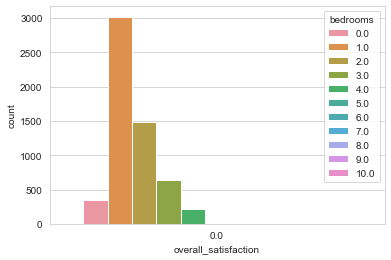

In [20]:
sns.countplot(data =low_rating, x = 'overall_satisfaction', hue = 'bedrooms')

In [21]:
rating_per_bedrooms = airbnb.groupby(by='bedrooms')['overall_satisfaction'].value_counts().to_frame()
rating_per_bedrooms

overall_satisfaction
bedrooms overall_satisfaction                      
0.0      5.0                                    431
         0.0                                    342
         4.5                                    317
         4.0                                     50
         3.5                                     10
         3.0                                      4
1.0      5.0                                   4759
         0.0                                   3020
         4.5                                   2814
         4.0                                    365
         3.5                                     71
         3.0                                      8
         1.0                                      1
2.0      5.0                                   1787
         0.0                                   1487
         4.5                                   1033
         4.0                                    127
         3.5                                     16
         3.0                                      6
3.0      0.0                                    635
         5.0                                    515
         4.5                                    266
         4.0                                     22
         3.5                                      5
         2.5                                      1
4.0      0.0                                    211
         5.0                                    159
         4.5                                     92
         4.0                                      8
         3.5                                      2
         3.0                                      1
5.0      5.0                                     34
         0.0                                     16
         4.5                                     11
         4.0                                      1
6.0      5.0                                      7
         4.5                                      6
         0.0                                      5
         3.5                                      1
7.0      0.0                                      2
         4.5                                      1
         5.0                                      1
8.0      4.5                                      2
         0.0                                      1
9.0      0.0                                      1
         5.0                                      1
10.0     5.0                                      3
         0.0                                      1
         4.5                                      1

In [22]:
#What is the satisfaction ratings count where price is greater than equal to 150 but less than equal to 180
range_price = low_rating[(low_rating['price'] >= 150) & (low_rating['price'] <=180)]
range_price 

,room_id,survey_id,host_id,room_type,country,city,borough,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,minstay,name,last_modified,latitude,longitude,location
47,14060573,1476,82283309,Entire home/apt,NaN,Amsterdam,NaN,Ijburg / Eiland Zeeburg,2,0.0,4,4.0,NaN,179.0,NaN,GORGEOUS family house with sunny garden!,2017-07-23 11:53:00.056659,52.346421,5.008598,0101000020E6100000793E03EACD081440E5D2F885572C...
48,19992596,1476,62831267,Entire home/apt,NaN,Amsterdam,NaN,Bijlmer Oost,0,0.0,4,3.0,NaN,174.0,NaN,3 bedroom apartment and free parking in the area,2017-07-23 11:52:34.764723,52.317621,4.973309,0101000020E6100000209C4F1DABE41340ECC20FCEA728...
89,16416572,1476,15586027,Entire home/apt,NaN,Amsterdam,NaN,Slotervaart,1,0.0,2,1.0,NaN,150.0,NaN,Spacious apartment with gorgeous view of Amste...,2017-07-23 09:38:35.623276,52.349530,4.835548,0101000020E6100000EDF318E599571340467C2766BD2C...
94,19550880,1476,87318173,Entire home/apt,NaN,Amsterdam,NaN,De Pijp / Rivierenbuurt,1,0.0,3,1.0,NaN,162.0,NaN,Beautiful spacious apartment near city center,2017-07-23 09:09:11.092421,52.343227,4.901935,0101000020E6100000967840D9949B1340560DC2DCEE2B...
97,19449107,1476,11285542,Entire home/apt,NaN,Amsterdam,NaN,Ijburg / Eiland Zeeburg,0,0.0,4,2.0,NaN,150.0,NaN,Modern and spacious apartment at IJburg,2017-07-23 08:57:59.918700,52.349957,5.007643,0101000020E61000005E2C0C91D3071440CE001764CB2C...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15776,7718405,1476,25023338,Private room,NaN,Amsterdam,NaN,Bos en Lommer,2,0.0,4,1.0,NaN,168.0,NaN,"Cosy, clean and beautiful shared apartment.",2017-07-22 16:35:48.966108,52.381706,4.855094,0101000020E6100000F705F4C29D6B1340EF5701BEDB30...
15778,11040038,1476,57290734,Private room,NaN,Amsterdam,NaN,De Baarsjes / Oud West,0,0.0,4,1.0,NaN,180.0,NaN,Private rooms: 2person+3person,2017-07-22 16:35:47.581008,52.364474,4.850923,0101000020E610000026A8E15B58671340041F8315A72E...
16012,19399592,1476,135998516,Private room,NaN,Amsterdam,NaN,Centrum West,1,0.0,2,1.0,NaN,179.0,NaN,Romantic floating room 1,2017-07-22 16:34:51.170804,52.371814,4.881898,0101000020E610000098A1F14410871340F418E599972F...
16019,19872575,1476,140574117,Private room,NaN,Amsterdam,NaN,Centrum Oost,0,0.0,2,0.0,NaN,180.0,NaN,Style Room,2017-07-22 16:34:49.451295,52.365466,4.883214,0101000020E6100000357A35406988134064E60297C72E...


In [23]:
# Create a copy of main airbnb dataset and impute the value 4 wherever the satisfaction count is 0
airbnb_df = airbnb.copy()

In [24]:
airbnb_df[['overall_satisfaction']] = airbnb_df[['overall_satisfaction']].replace(0,4)
airbnb_df.head()

,room_id,survey_id,host_id,room_type,country,city,borough,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,minstay,name,last_modified,latitude,longitude,location
33,10201214,1476,8497487,Entire home/apt,NaN,Amsterdam,NaN,Ijburg / Eiland Zeeburg,19,5.0,8,4.0,NaN,763.0,NaN,Beautiful Watervilla in Amsterdam,2017-07-23 13:02:10.468528,52.348254,5.001477,0101000020E6100000E7C8CA2F83011440C0594A96932C...
34,3119298,1476,15847782,Entire home/apt,NaN,Amsterdam,NaN,Westerpark,1,4.0,8,3.0,NaN,445.0,NaN,Modern 5-8 person apartment,2017-07-23 12:58:15.945759,52.377581,4.873119,0101000020E61000009D103AE8127E1340A54BFF925430...
35,5372074,1476,14390964,Entire home/apt,NaN,Amsterdam,NaN,Centrum West,10,5.0,4,3.0,NaN,721.0,NaN,Prinsengracht Appartement,2017-07-23 12:52:40.980471,52.373078,4.884269,0101000020E61000006C770FD07D891340B56D1805C12F...
36,10511291,1476,5421078,Entire home/apt,NaN,Amsterdam,NaN,Watergraafsmeer,1,4.0,8,3.0,NaN,1412.0,NaN,Whole house 200m2 Frankendael Park,2017-07-23 12:30:42.249974,52.350968,4.929821,0101000020E61000003B8908FF22B81340A5F8F884EC2C...
37,18047871,1476,9302267,Entire home/apt,NaN,Amsterdam,NaN,Centrum West,0,4.0,4,4.0,NaN,541.0,NaN,Great 4 bedroom apartment at the flower market,2017-07-23 12:30:27.637777,52.367890,4.889273,0101000020E6100000FDDCD0949D8E13404243FF04172F...


Most of the ratings which is being given is 4 (the mean) to the apartment sp that's why since it is the most frequent one assume that would be a rating where the satisfaction ground is 0

In [25]:
# Take the count of overall satisfaction ratings again after this imputation and compare with main dataset where still 0 is present
airbnb_df.groupby(by='bedrooms')['overall_satisfaction'].value_counts()

bedrooms  overall_satisfaction
0.0       5.0                      431
          4.0                      392
          4.5                      317
          3.5                       10
          3.0                        4
1.0       5.0                     4759
          4.0                     3385
          4.5                     2814
          3.5                       71
          3.0                        8
          1.0                        1
2.0       5.0                     1787
          4.0                     1614
          4.5                     1033
          3.5                       16
          3.0                        6
3.0       4.0                      657
          5.0                      515
          4.5                      266
          3.5                        5
          2.5                        1
4.0       4.0                      219
          5.0                      159
          4.5                       92
          3.5                    

In [26]:
# On which price most of the properties are available
top_10_best_price = airbnb_df.price.value_counts().sort_values(ascending = False).head(10)
top_10_best_price

119.0    1023
180.0     999
144.0     886
150.0     621
132.0     587
108.0     561
96.0      518
114.0     509
118.0     508
240.0     495
Name: price, dtype: int64

Text(0.5, 1.0, 'The most demanded price')

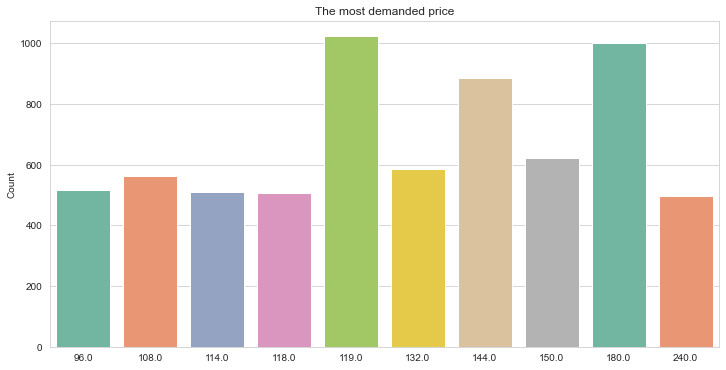

In [27]:
plt.figure(figsize = (12,6))
sns.barplot(x = top_10_best_price.index, y =top_10_best_price , palette = 'Set2' )
plt.ylabel('Count')
plt.title('The most demanded price')

In [28]:
#What is the proportion of each bedroom values in overall bedroom values
airbnb_df.bedrooms.value_counts(normalize = True)

1.0     0.591533
2.0     0.238800
3.0     0.077385
0.0     0.061844
4.0     0.025348
5.0     0.003323
6.0     0.001018
10.0    0.000268
7.0     0.000214
8.0     0.000161
9.0     0.000107
Name: bedrooms, dtype: float64

properities which have one bedroom are the most contribution to the proportion of bedroom feature

In [29]:
#Drop value where bedroom are equal to zero
airbnb_df.drop(airbnb_df.index[airbnb['bedrooms'] == 0], inplace = True)

we can assuming that this is an error or this is a mistake and we are going to remove that all the row where the bedroom is equals zero 

In [30]:
#Take the count of bedroom again which is without the zero values
airbnb_df.bedrooms.value_counts()

1.0     11038
2.0      4456
3.0      1444
4.0       473
5.0        62
6.0        19
10.0        5
7.0         4
8.0         3
9.0         2
Name: bedrooms, dtype: int64

In [31]:
airbnb_df.bedrooms.value_counts(normalize = True)

1.0     0.630527
2.0     0.254541
3.0     0.082486
4.0     0.027019
5.0     0.003542
6.0     0.001085
10.0    0.000286
7.0     0.000228
8.0     0.000171
9.0     0.000114
Name: bedrooms, dtype: float64

In [32]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17506 entries, 33 to 18722
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   room_id               17506 non-null  int64  
 1   survey_id             17506 non-null  int64  
 2   host_id               17506 non-null  int64  
 3   room_type             17506 non-null  object 
 4   country               0 non-null      float64
 5   city                  17506 non-null  object 
 6   borough               0 non-null      float64
 7   neighborhood          17506 non-null  object 
 8   reviews               17506 non-null  int64  
 9   overall_satisfaction  17506 non-null  float64
 10  accommodates          17506 non-null  int64  
 11  bedrooms              17506 non-null  float64
 12  bathrooms             0 non-null      float64
 13  price                 17506 non-null  float64
 14  minstay               0 non-null      float64
 15  name              

In [33]:
airbnb_df.describe()

,room_id,survey_id,host_id,country,borough,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,minstay,latitude,longitude
count,1.750600e+04,17506.0,1.750600e+04,0.0,0.0,17506.000000,17506.000000,17506.000000,17506.000000,0.0,17506.000000,0.0,17506.000000,17506.000000
mean,1.108287e+07,1476.0,3.509582e+07,NaN,NaN,16.368959,4.531932,2.960642,1.526220,NaN,169.137267,NaN,52.365207,4.888416
std,6.080450e+06,0.0,3.710345e+07,NaN,NaN,32.796906,0.441955,1.333545,0.825627,NaN,111.009236,NaN,0.015112,0.034722
min,2.818000e+03,1476.0,2.234000e+03,NaN,NaN,0.000000,1.000000,1.000000,1.000000,NaN,12.000000,NaN,52.296200,4.763264
25%,5.923722e+06,1476.0,7.004309e+06,NaN,NaN,2.000000,4.000000,2.000000,1.000000,NaN,113.000000,NaN,52.355177,4.863899
50%,1.210997e+07,1476.0,1.956281e+07,NaN,NaN,6.000000,4.500000,2.000000,1.000000,NaN,144.000000,NaN,52.364507,4.885528
75%,1.643984e+07,1476.0,5.089235e+07,NaN,NaN,17.000000,5.000000,4.000000,2.000000,NaN,196.000000,NaN,52.374604,4.907448
max,2.000373e+07,1476.0,1.418319e+08,NaN,NaN,532.000000,5.000000,17.000000,10.000000,NaN,6000.000000,NaN,52.424980,5.027689


In [34]:
#Plot the histogram off reviews where bin are 20 and range is between o to 100.

In [35]:
filtered_review_to_100 = airbnb_df.loc[airbnb_df['reviews'] <=100]
filtered_review_to_100.head()

,room_id,survey_id,host_id,room_type,country,city,borough,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,minstay,name,last_modified,latitude,longitude,location
33,10201214,1476,8497487,Entire home/apt,NaN,Amsterdam,NaN,Ijburg / Eiland Zeeburg,19,5.0,8,4.0,NaN,763.0,NaN,Beautiful Watervilla in Amsterdam,2017-07-23 13:02:10.468528,52.348254,5.001477,0101000020E6100000E7C8CA2F83011440C0594A96932C...
34,3119298,1476,15847782,Entire home/apt,NaN,Amsterdam,NaN,Westerpark,1,4.0,8,3.0,NaN,445.0,NaN,Modern 5-8 person apartment,2017-07-23 12:58:15.945759,52.377581,4.873119,0101000020E61000009D103AE8127E1340A54BFF925430...
35,5372074,1476,14390964,Entire home/apt,NaN,Amsterdam,NaN,Centrum West,10,5.0,4,3.0,NaN,721.0,NaN,Prinsengracht Appartement,2017-07-23 12:52:40.980471,52.373078,4.884269,0101000020E61000006C770FD07D891340B56D1805C12F...
36,10511291,1476,5421078,Entire home/apt,NaN,Amsterdam,NaN,Watergraafsmeer,1,4.0,8,3.0,NaN,1412.0,NaN,Whole house 200m2 Frankendael Park,2017-07-23 12:30:42.249974,52.350968,4.929821,0101000020E61000003B8908FF22B81340A5F8F884EC2C...
37,18047871,1476,9302267,Entire home/apt,NaN,Amsterdam,NaN,Centrum West,0,4.0,4,4.0,NaN,541.0,NaN,Great 4 bedroom apartment at the flower market,2017-07-23 12:30:27.637777,52.367890,4.889273,0101000020E6100000FDDCD0949D8E13404243FF04172F...


Text(0, 0.5, 'Num of reviews')

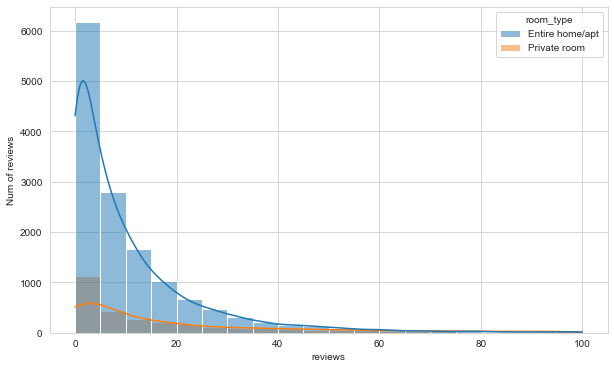

In [36]:
plt.figure(figsize = (10,6))
sns.histplot(data = filtered_review_to_100, x = "reviews",hue ="room_type", bins = 20,kde= True)
plt.ylabel('Num of reviews')

(array([7292., 3231., 1943., 1235.,  836.,  577.,  411.,  321.,  232.,
         196.,  159.,  115.,   91.,   77.,   82.,   51.,   49.,   45.,
          44.,   57.]),
 array([  0.,   5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.,  50.,
         55.,  60.,  65.,  70.,  75.,  80.,  85.,  90.,  95., 100.]),
 <BarContainer object of 20 artists>)

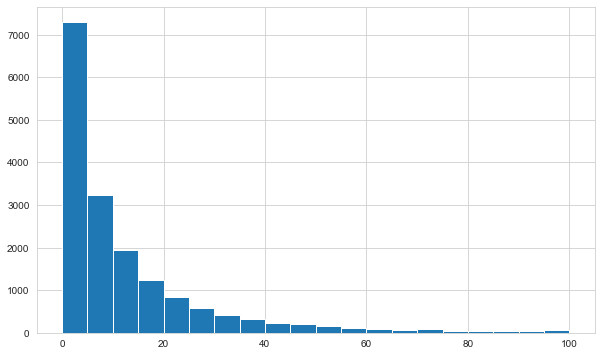

In [37]:
plt.figure(figsize = (10,6))
plt.hist(filtered_review_to_100['reviews'], bins = 20, histtype="bar")

Text(0, 0.5, 'Num of reviews')

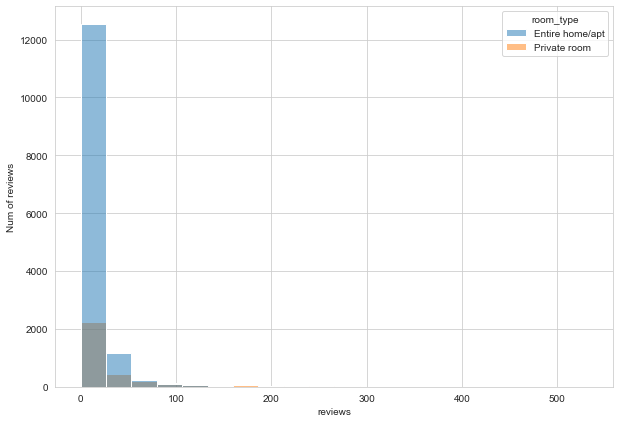

In [38]:
filtered_review_to_1000 = airbnb_df.loc[airbnb_df['reviews'] <=1000]
plt.figure(figsize = (10,7))
sns.histplot(data = filtered_review_to_1000, x = "reviews",hue ="room_type", bins = 20)
plt.ylabel('Num of reviews')

<AxesSubplot:xlabel='accommodates', ylabel='Count'>

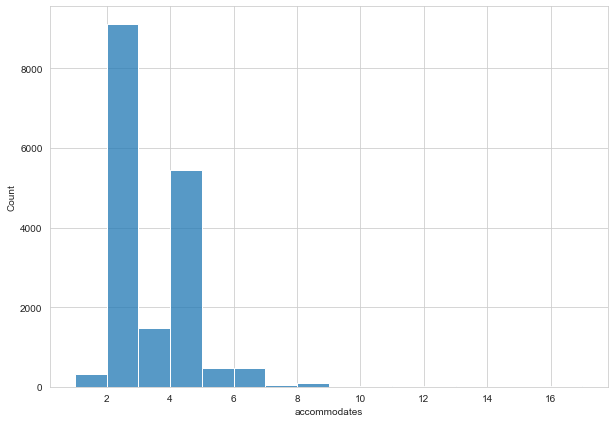

In [39]:
#Plot a histogram of accomodates where bins are 16
plt.figure(figsize = (10,7))
sns.histplot(data = airbnb_df,x="accommodates", bins=16)

(array([3.250e+02, 9.105e+03, 1.489e+03, 5.437e+03, 4.640e+02, 4.710e+02,
        5.200e+01, 1.050e+02, 8.000e+00, 1.500e+01, 2.000e+00, 8.000e+00,
        0.000e+00, 6.000e+00, 0.000e+00, 1.900e+01]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17.]),
 <BarContainer object of 16 artists>)

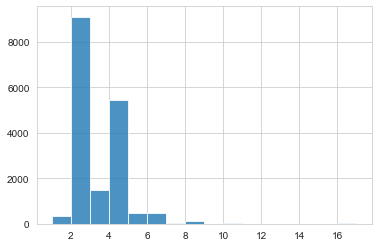

In [40]:
plt.hist(airbnb_df['accommodates'], bins =16, histtype = 'bar',alpha = 0.8)

(array([1.0000e+00, 1.0000e+00, 1.5000e+01, 5.9970e+03, 1.1492e+04]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. ]),
 <BarContainer object of 5 artists>)

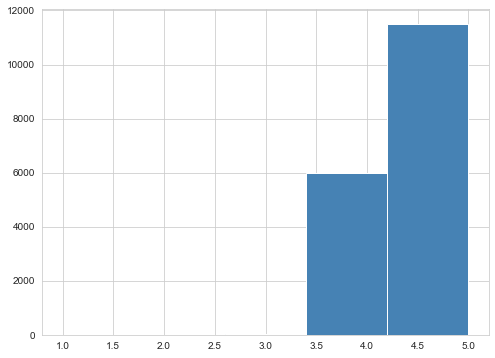

In [41]:
#Plot a histogram of overall_satisfaction
plt.figure(figsize = (8,6))
plt.hist(airbnb_df['overall_satisfaction'], bins = 5, histtype = 'bar', color = 'steelblue')

In [42]:
#Plot the histogram of overall_statisfaction where price is greater than equal to 100 and less than equal to 200
satisfaction_filtered = airbnb_df[(airbnb_df['price']>=100) & (airbnb_df['price']<=200)]
satisfaction_filtered.head()

,room_id,survey_id,host_id,room_type,country,city,borough,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,minstay,name,last_modified,latitude,longitude,location
45,6419174,1476,7689979,Entire home/apt,NaN,Amsterdam,NaN,Centrum West,25,4.5,3,1.0,NaN,186.0,NaN,JORDAAN - cozy 2 room apartment,2017-07-23 12:01:28.074061,52.374855,4.878050,0101000020E6100000DE02098A1F831340FCDEA63FFB2F...
47,14060573,1476,82283309,Entire home/apt,NaN,Amsterdam,NaN,Ijburg / Eiland Zeeburg,2,4.0,4,4.0,NaN,179.0,NaN,GORGEOUS family house with sunny garden!,2017-07-23 11:53:00.056659,52.346421,5.008598,0101000020E6100000793E03EACD081440E5D2F885572C...
48,19992596,1476,62831267,Entire home/apt,NaN,Amsterdam,NaN,Bijlmer Oost,0,4.0,4,3.0,NaN,174.0,NaN,3 bedroom apartment and free parking in the area,2017-07-23 11:52:34.764723,52.317621,4.973309,0101000020E6100000209C4F1DABE41340ECC20FCEA728...
49,19845595,1476,7601328,Entire home/apt,NaN,Amsterdam,NaN,Oud Oost,0,4.0,4,2.0,NaN,132.0,NaN,"Lovely apartment with garden, close to the centre",2017-07-23 11:40:49.947253,52.355498,4.910895,0101000020E6100000145CACA8C1A413408EE55DF5802D...
50,5683725,1476,29468440,Entire home/apt,NaN,Amsterdam,NaN,Bijlmer Centrum,17,4.5,4,2.0,NaN,108.0,NaN,Nice & spacious apartment,2017-07-23 11:40:10.707836,52.317343,4.944083,0101000020E610000099D6A6B1BDC61340A94E07B29E28...


#As we can see the chart about "The most demanded price" above, the range of average price that customer had chosen almost is from 100 to 200. So we will create a chart to see satisfactions i range of those price.

<AxesSubplot:xlabel='overall_satisfaction', ylabel='Count'>

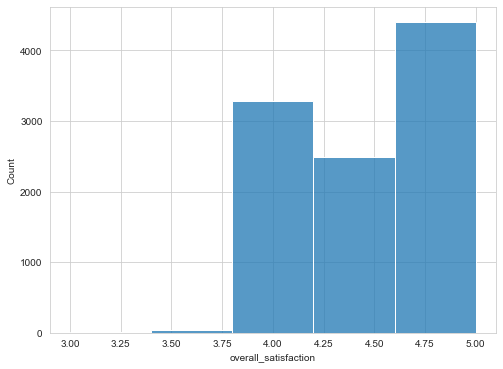

In [43]:
#Plot a histogram of overall_satisfaction
plt.figure(figsize = (8,6))
sns.histplot(data = satisfaction_filtered, x= 'overall_satisfaction', bins=5 )

<AxesSubplot:xlabel='overall_satisfaction', ylabel='Count'>

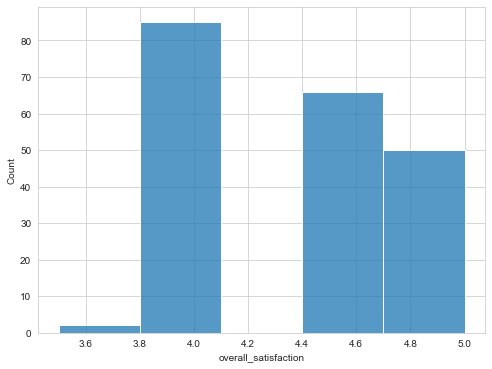

In [44]:
#Plot the histogram of overall_statisfaction where price less than 50
plt.figure(figsize = (8,6))
sns.histplot(data = airbnb_df[(airbnb_df['price']<=50)], x= 'overall_satisfaction', bins=5 )

In [45]:
# we can see difference of shape as compared 2 histogram above 

<AxesSubplot:xlabel='overall_satisfaction', ylabel='Count'>

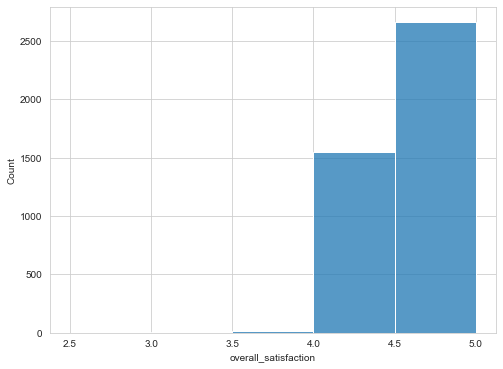

In [46]:
plt.figure(figsize = (8,6))
sns.histplot(data = airbnb_df[(airbnb_df['price']>200)], x= 'overall_satisfaction', bins=5 )

In [47]:
price_categories = ['Low','Standard','High','Expensive']
cut_bins=[0,50,200,300,6000]
airbnb_df['price_cut']=pd.cut(airbnb_df['price'], bins = cut_bins, labels =price_categories)

In [48]:
airbnb_df.groupby(by='price_cut')['overall_satisfaction'].value_counts()

price_cut  overall_satisfaction
Low        4.0                       85
           4.5                       66
           5.0                       50
           3.5                        2
Standard   5.0                     5342
           4.0                     4267
           4.5                     3375
           3.5                       76
           3.0                       11
           1.0                        1
High       5.0                     1393
           4.0                     1148
           4.5                      587
           3.5                       12
           3.0                        4
Expensive  5.0                      481
           4.0                      402
           4.5                      198
           3.5                        5
           2.5                        1
Name: overall_satisfaction, dtype: int64

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


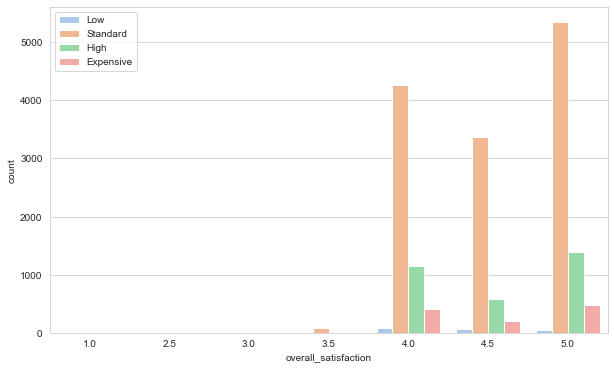

In [49]:
#sns.histplot(data=airbnb_df,x = 'overall_satisfaction',hue ='price_cut',bins = 10, alpha = 0.4)
plt.figure(figsize=(10,6))
sns.countplot(airbnb_df.overall_satisfaction, hue=airbnb_df.price_cut, palette="pastel");
plt.legend(loc= 'upper left')

We can see that at the standard price ( from 50 to 200). we get a good satisfactions and low rate at the high price

In [50]:
#Is there the relationship between price and reviews
airbnb_df.groupby(by='price_cut')['reviews'].value_counts()

price_cut  reviews
Low        0          39
           1          24
           3          14
           2          13
           4          12
                      ..
Expensive  135         1
           167         1
           190         1
           284         1
           321         1
Name: reviews, Length: 534, dtype: int64

<AxesSubplot:xlabel='price_cut', ylabel='reviews'>

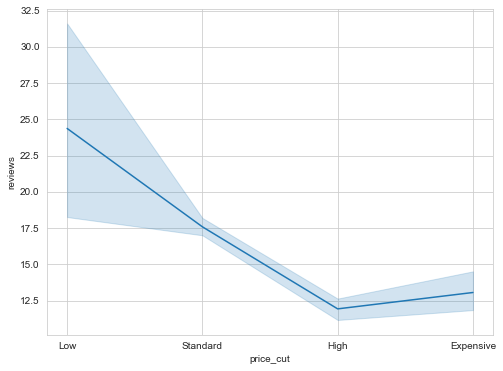

In [51]:
plt.figure(figsize = (8,6))
sns.lineplot(data = airbnb_df,x= 'price_cut',y = 'reviews')

At low price (<50) we have a large amount of reviews for properties.By contrast, there are not too much reviews received in the high price 

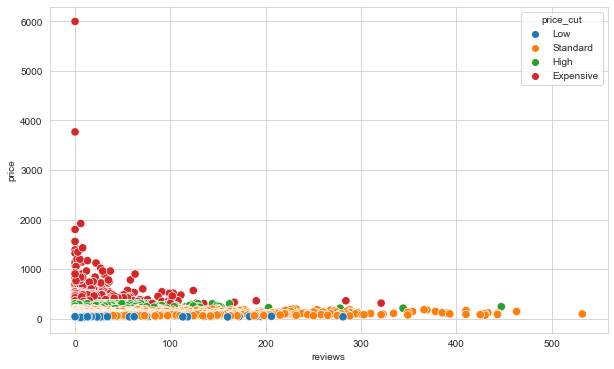

In [52]:
plt.figure(figsize =(10,6))
sns.scatterplot(data = airbnb_df,
                y= 'price',
                x='reviews',
                hue = 'price_cut',
                s=70);

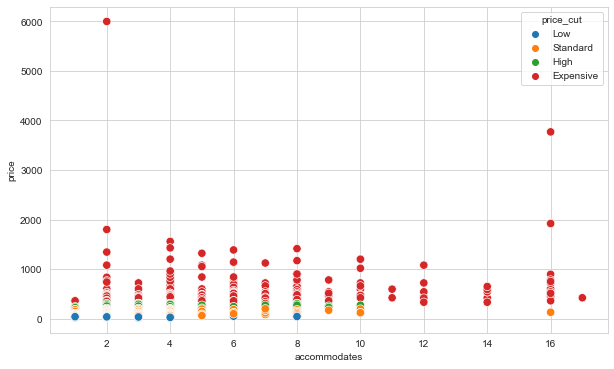

In [53]:
#Is there any relationship between accommodates and prices
plt.figure(figsize =(10,6))
sns.scatterplot(data = airbnb_df,
                y= 'price',
                x='accommodates',
                hue ='price_cut',
                s=70);

Properties have many accomodates(11 - 16) have high and expensive price

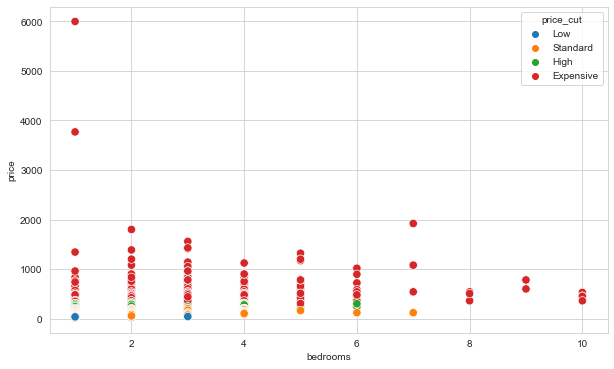

In [54]:
#Is there the relationship between price and bedrooms
plt.figure(figsize =(10,6))
sns.scatterplot(data = airbnb_df,
                y= 'price',
                x='bedrooms',
                hue ='price_cut',
                s=70);

In [55]:
#Plot the count of each neighborhood to understand in which neiborhood most of the availability of accomodation
airbnb_df.groupby(by='neighborhood')['accommodates'].value_counts().to_frame()


accommodates
neighborhood    accommodates              
Bijlmer Centrum 2                       41
                4                       19
                3                       12
                1                        4
                5                        4
...                                    ...
Westerpark      16                       3
                10                       1
Westpoort       2                        6
                4                        3
                3                        1

[203 rows x 1 columns]

In [56]:
unique_neighborhood = airbnb_df.neighborhood.unique()
unique_neighborhood

array(['Ijburg / Eiland Zeeburg', 'Westerpark', 'Centrum West',
       'Watergraafsmeer', 'Noord-West / Noord-Midden',
       'De Pijp / Rivierenbuurt', 'De Aker / Nieuw Sloten',
       'Centrum Oost', 'Noord West', 'Bijlmer Oost', 'Oud Oost',
       'Bijlmer Centrum', 'Buitenveldert / Zuidas', 'Oud Noord',
       'De Baarsjes / Oud West', 'Osdorp', 'Noord Oost', 'Slotervaart',
       'Bos en Lommer', 'Oostelijk Havengebied / Indische Buurt',
       'Geuzenveld / Slotermeer', 'Gaasperdam / Driemond', 'Westpoort'],
      dtype=object)

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, 'Ijburg / Eiland Zeeburg'),
 Text(1, 0, 'Westerpark'),
 Text(2, 0, 'Centrum West'),
 Text(3, 0, 'Watergraafsmeer'),
 Text(4, 0, 'Noord-West / Noord-Midden'),
 Text(5, 0, 'De Pijp / Rivierenbuurt'),
 Text(6, 0, 'De Aker / Nieuw Sloten'),
 Text(7, 0, 'Centrum Oost'),
 Text(8, 0, 'Noord West'),
 Text(9, 0, 'Bijlmer Oost'),
 Text(10, 0, 'Oud Oost'),
 Text(11, 0, 'Bijlmer Centrum'),
 Text(12, 0, 'Buitenveldert / Zuidas'),
 Text(13, 0, 'Oud Noord'),
 Text(14, 0, 'De Baarsjes / Oud West'),
 Text(15, 0, 'Osdorp'),
 Text(16, 0, 'Noord Oost'),
 Text(17, 0, 'Slotervaart'),
 Text(18, 0, 'Bos en Lommer'),
 Text(19, 0, 'Oostelijk Havengebied / Indische Buurt'),
 Text(20, 0, 'Geuzenveld / Slotermeer'),
 Text(21, 0, 'Gaasperdam / Driemond'),
 Text(22, 0, 'Westpoort')]

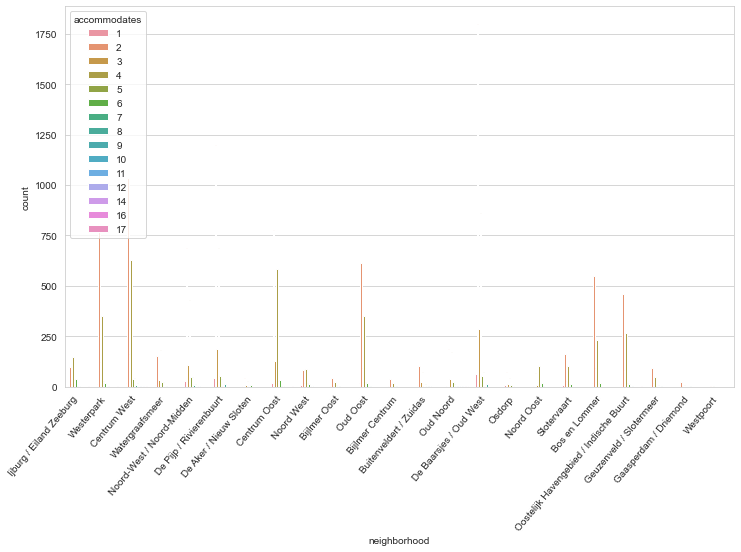

In [57]:
order = ['Ijburg / Eiland Zeeburg','Westerpark','Centrum West','Watergraafsmeer','Noord-West / Noord-Midden','De Pijp / Rivierenbuurt','De Aker / Nieuw Sloten','Centrum Oost','Noord West','Bijlmer Oost','Oud Oost','Bijlmer Centrum','Buitenveldert / Zuidas','Oud Noord','De Baarsjes / Oud West','Osdorp','Noord Oost','Slotervaart','Bos en Lommer', 'Oostelijk Havengebied / Indische Buurt',
       'Geuzenveld / Slotermeer', 'Gaasperdam / Driemond', 'Westpoort']
plt.figure(figsize=(12,7))
ax = sns.countplot(airbnb_df.neighborhood,hue =airbnb_df.accommodates, order = order)
ax.set_xticklabels(ax.get_xticklabels(),rotation=50, ha='right')

<AxesSubplot:xlabel='accommodates', ylabel='count'>

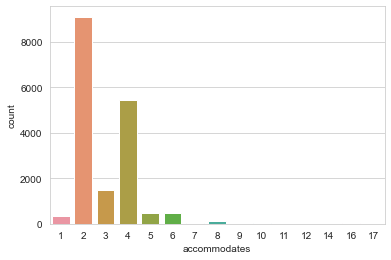

In [58]:
sns.countplot(data = airbnb_df, x="accommodates")

<AxesSubplot:xlabel='price'>

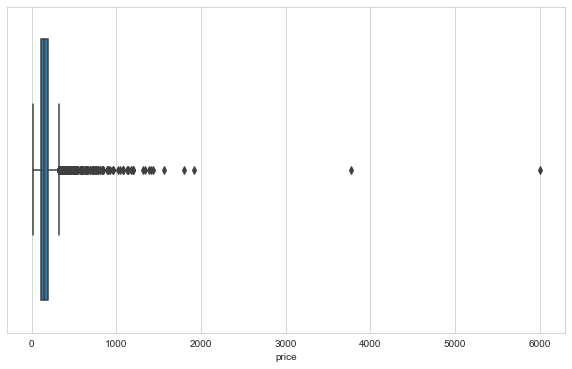

In [59]:
#Find outliers of Price value ( row have price less than 1500)?
plt.figure(figsize=(10,6))
sns.boxplot(data = airbnb_df, x = "price")

In [69]:
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [61]:
#find absolute value of z-score for each observation
z = np.abs(stats.zscore(airbnb_df.price))

#only keep rows in dataframe with all z-scores less than absolute value of 3 
data_clean = airbnb_df.price[(z<3)]

#find how many rows are left in the dataframe 
data_clean.shape

(17312,)

In [67]:
#Import the relevant sklearn libraries from splitting the data in test and split as well as for linear regression
from sklearn import linear_model
x = airbnb_df.price
y = airbnb_df.drop("price",axis =1)

#splitting
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

#printing shapes of testing and training sets :
print("shape of original dataset :", airbnb_df.shape)
print("shape of input - training set", x_train.shape)
print("shape of output - training set", y_train.shape)
print("shape of input - testing set", x_test.shape)
print("shape of output - testing set", y_test.shape)

shape of original dataset : (17506, 21)
shape of input - training set (14004,)
shape of output - training set (14004, 20)
shape of input - testing set (3502,)
shape of output - testing set (3502, 20)


To train the model, we have to import the Linear Regression model, which we have already created at the beginning. Use the fit method, and pass the training sets into it to train the model.

In [1]:
linreg= LinearRegression()
linreg.fit(x_train,y_train)
y_pred=linreg.predict(x_test)
y_pred

NameError: name 'LinearRegression' is not defined